In [1]:
import pandas as pd
import giottotime

In [2]:
df = pd.read_csv("data/raw/df_accidents.csv")

In [3]:
df["date"] = pd.to_datetime(df["date"])

In [4]:
df.set_index("date", inplace=True)

In [5]:
df.head()

,number of accidents,Temperature,windspeed
date,,,
2014-01-01,608,270.448750,2.166667
2014-01-02,1702,271.283729,3.291667
2014-01-03,1371,263.582708,3.583333
2014-01-04,903,262.514166,1.708333
2014-01-05,775,268.074167,0.958333


# De-trending

In [6]:
temperature = df["Temperature"]

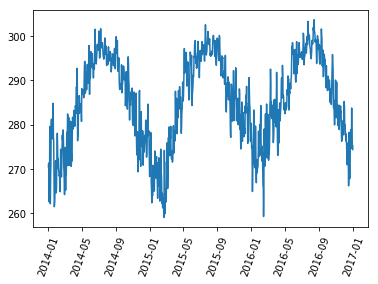

In [15]:
import matplotlib.pyplot as plt

plt.plot(temperature)
plt.xticks(rotation=70)
plt.show()

### Polynomial de-trending

In [8]:
from giottotime.models import PolynomialTrend

In [9]:
polynomial_trend = PolynomialTrend(order=3)

In [10]:
polynomial_trend.fit(temperature)

PolynomialTrend(3, <function mean_squared_error at 0x1369dae18>, BFGS)

In [11]:
detrended_polynomial_temperature = polynomial_trend.transform(temperature)
#detrended_exponential_temperature = exponential_trend.transform(temperature)

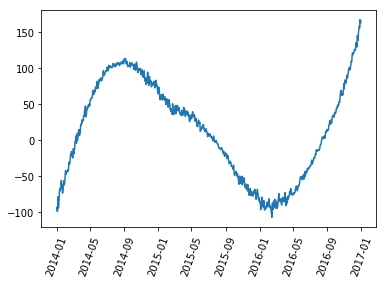

In [12]:
plt.plot(detrended_polynomial_temperature)
plt.xticks(rotation=70)
plt.show()

### Exponentialde-trending

In [13]:
from giottotime.models import ExponentialTrend

In [16]:
exponential_trend = ExponentialTrend()

In [17]:
exponential_trend.fit(temperature[:700])

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/_regression.py:254: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/_regression.py:254: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/_regression.py:254: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/optimize/optimize.py:696: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/metrics/_regression.py:254: R

ExponentialTrend(<function mean_squared_error at 0x1369dae18>, BFGS)

In [18]:
detrended_exponential_temperature = exponential_trend.transform(temperature)

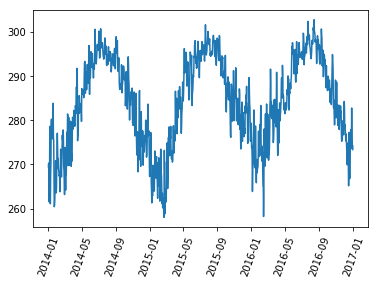

In [19]:
plt.plot(detrended_exponential_temperature)
plt.xticks(rotation=70)
plt.show()